## Scipy tutorial 

#### Special function (scipy.special)

Bassel functions of real order (jn, jn_zeros)

Bassel functions are a family of solutions to Bassel's differential equation with real or complex order alpha
\begin{align}
x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2)y = 0
\end{align}

In [9]:
%load_ext Cython

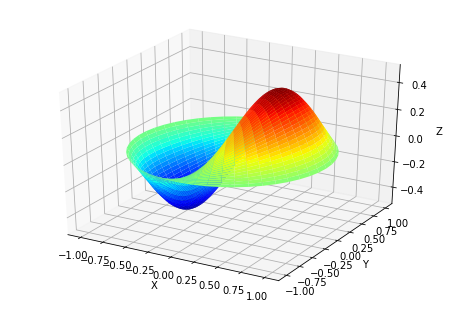

In [10]:
from scipy import special
import numpy as np 

def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n,k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance* kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<br>
<br>
Scipy also offers Cython bindings for scalar, typed version of many of the functions in special.

In [11]:
%%cython
cimport scipy.special.cython_special as csc
cdef:
    double x = 1
    double complex z = 1 + 1j
    double si, ci, rgam
    double complex cgam
    
rgam = csc.gamma(x)
print(rgam)
cgam = csc.gamma(z)
print(cgam)
csc.sici(x, &si, &ci)
print(si, ci)

1.0
(0.498015668118-0.154949828302j)
(0.9460830703671831, 0.33740392290096816)
